In [2]:
import os
import cv2
import glob 
import numpy as np 
from img_utils import plot_img_opencv ,calc_image_range,Normalize_img_by_min_max
from skimage.transform import resize as skimage_resize 
from template_matching import template_matching_func

In [3]:
def downsample_one_scene_according_one_template(scene_path,template_path,save = False , output_path = '' ,param_scale_ratio_low = 1.5 , param_scale_ratio_high = 3  ,  num_of_samples = 6,show = False):


    scene_name = os.path.basename(scene_path)[:-len('.jpg')]
    template_name = os.path.basename(template_path)[:-len('.jpg')]
   
    scene = cv2.imread(scene_path,0)  
    template = cv2.imread(template_path,0) 
    
    h_w_template_array = np.array(template.shape[:2])
    scaling_ratios = np.linspace(param_scale_ratio_low ,param_scale_ratio_high,num_of_samples)
    
    for scale_ratio in scaling_ratios:
        
        h_scene_new , w_scene_new  = np.ceil(scale_ratio * h_w_template_array)
        
        downsampled_scene = skimage_resize(scene.copy(), ( h_scene_new, w_scene_new), anti_aliasing=True )
        downsampled_scene = Normalize_img_by_min_max(downsampled_scene)
        
        if show : 
            print('################################################')
            print(f'template : {h_w_template_array[0]},{h_w_template_array[1]}')
            print(f'scene : {h_scene_new},{w_scene_new}')
            print(f'ratio : {h_w_template_array[0]/h_scene_new} , {h_w_template_array[1]/w_scene_new}') 
            print('################################################')


        scene_downsampled_name = f'{scene_name}_downsampled_to_{h_scene_new}_{w_scene_new}.jpg'
        scene_downsampled_name = os.path.join(output_path , scene_downsampled_name)

        if save : 

            cv2.imwrite(scene_downsampled_name,downsampled_scene)
    
    return downsampled_scene , template ,scene_downsampled_name , template_path


Score before low pass
the coord of the max_loc is : (24, 585) with score of 0.6288225650787354
Score after low pass
the coord of the max_loc is : (0, 596) with score of 0.6245608329772949


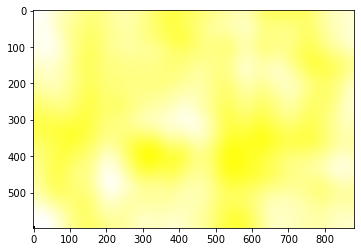

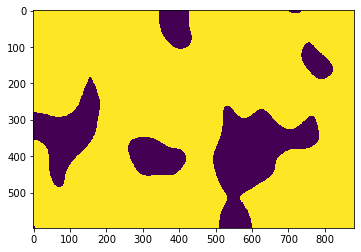

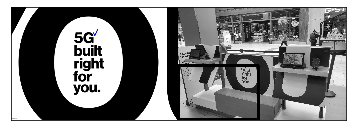

Score before low pass
the coord of the max_loc is : (346, 566) with score of 0.6524461507797241
Score after low pass
the coord of the max_loc is : (0, 0) with score of 0.6444063782691956


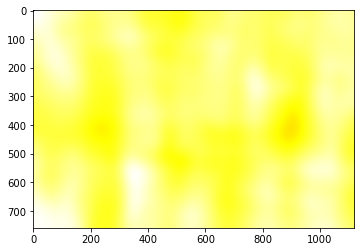

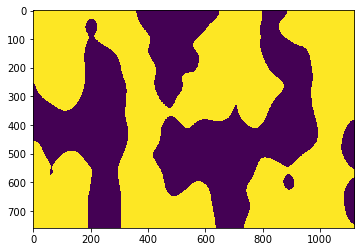

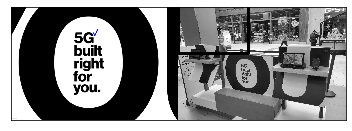

Score before low pass
the coord of the max_loc is : (481, 629) with score of 0.7044669985771179
Score after low pass
the coord of the max_loc is : (485, 625) with score of 0.680578351020813


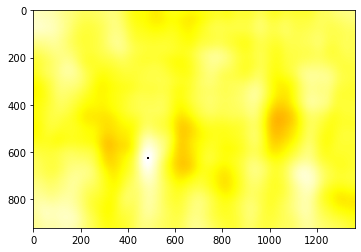

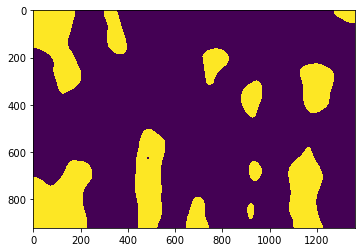

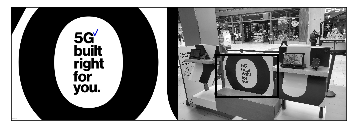

Score before low pass
the coord of the max_loc is : (609, 694) with score of 0.7888695597648621
Score after low pass
the coord of the max_loc is : (609, 700) with score of 0.7567326426506042


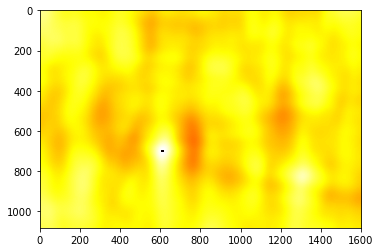

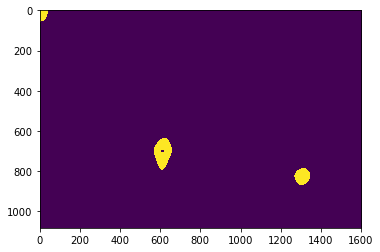

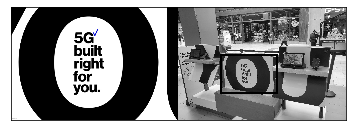

Score before low pass
the coord of the max_loc is : (400, 149) with score of 0.6113634705543518
Score after low pass
the coord of the max_loc is : (196, 205) with score of 0.5965399742126465


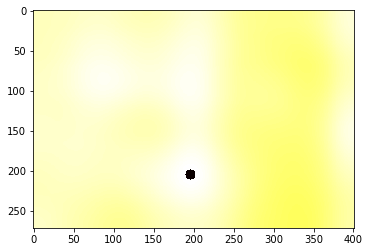

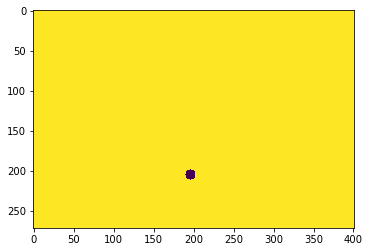

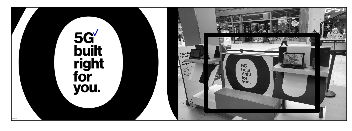

Score before low pass
the coord of the max_loc is : (279, 217) with score of 0.6237319111824036
Score after low pass
the coord of the max_loc is : (284, 213) with score of 0.6139735579490662


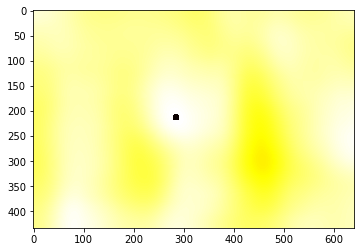

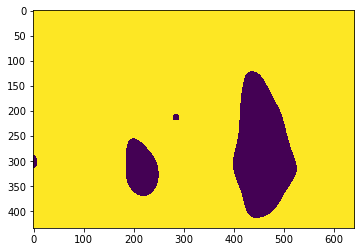

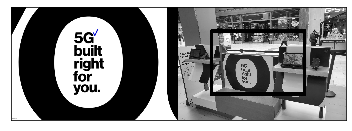

In [4]:
def main(): 


    scene_path = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115029.jpg'
    scene_path_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/20210604_115059.jpg'

    template_path = '/home/arpalus/Work_Eldad/Arpalus_Code/Eldad-Local/arpalus-poster_detection/Resulotion_test_data/Second EXP - big letters Y U/input_images_hard_big_letters/APPBARBSBMN24x150421.jpg'
    template_path_O_ = 'Data_new/planograms/resolution_test/Watchung/APPBARBSEMN39x270421.jpg'
    
    downsampled_scene_dir_path = 'Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/downsampled_scene_dir_path_Y'
    downsampled_scene_dir_path_O_='Resulotion_test_data/Second EXP - big letters Y U/scene_new_images/downsampled_scene_dir_path_O'
    
    downsampled_template_matching_results = 'Resulotion_test_data/Second EXP - big letters Y U/downsampled_template_matching_results_hard_postive'
    downsampled_template_matching_results_O_ = 'Resulotion_test_data/Second EXP - big letters Y U/downsampled_template_matching_results_easy_postive'

    #scaling scene to different scales according to planogram poster 
    
    #### O #####

    scene_downsampled_img, template_img, scene_downsampled_img_path ,template_img_path = downsample_one_scene_according_one_template(scene_path_O_,template_path_O_,save = True , output_path = downsampled_scene_dir_path_O_)

    for scene_downsampled_img_path in sorted(glob.glob(downsampled_scene_dir_path_O_ + '/*.jpg')):
    
        template_matching_func(scene_downsampled_img_path,template_path_O_,output_path = downsampled_template_matching_results_O_,show = True,save = True,th = 0.5)



    ### Y ####

    # scene_downsampled_img, template_img, scene_downsampled_img_path ,template_img_path = downsample_one_scene_according_one_template(scene_path,template_path,save = True , output_path = downsampled_scene_dir_path)
    # # template matching of 1 poster with different scales of scene 

    # for scene_downsampled_img_path in sorted(glob.glob(downsampled_scene_dir_path + '/*.jpg')):
    
    #     template_matching_func(scene_downsampled_img_path,template_path_O_,output_path = downsampled_template_matching_results,show = True,save = True,th = 0.5)

if __name__ == "__main__":

    main()
    